In [4]:
import itertools
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [5]:
# load features df from csv (for the NER gold labels)

train_df = pd.read_csv('train_features.tsv', sep='\t', keep_default_na=False)
test_df = pd.read_csv('test_features.tsv', sep='\t', keep_default_na=False)

In [3]:
# load list of dictionaries (for X features)

with open('train_X_features.json', 'r') as infile:
    train_feat_dict_list = json.load(infile)

with open('test_X_features.json', 'r') as infile:
    test_feat_dict_list = json.load(infile)

In [4]:
# vectorize, fit, transform

vec = DictVectorizer()

X_train = vec.fit_transform(train_feat_dict_list)
y_train = list(train_df.NER_gold)

X_test = vec.transform(test_feat_dict_list)
y_test = list(test_df.NER_gold)

In [5]:
# train linear SVM model

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
# training accuracy

y_pred_lsvc_train = lsvc.predict(X_train)

print(f"Training accuracy: {accuracy_score(y_train, y_pred_lsvc_train).round(2)}")

Training accuracy: 1.0


In [7]:
# testing accuracy

y_pred_lsvc = lsvc.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred_lsvc).round(2)}")

Test accuracy: 0.98


In [8]:
# other metrics

for avg in ['micro', 'macro', 'weighted']:
    print(f"Precision ({avg}): {precision_score(y_test, y_pred_lsvc, average=avg).round(2)}")
    print(f"Recall ({avg}): {recall_score(y_test, y_pred_lsvc, average=avg).round(2)}")
    print(f"F1-score ({avg}): {f1_score(y_test, y_pred_lsvc, average=avg).round(2)}")

Precision (micro): 0.98
Recall (micro): 0.98
F1-score (micro): 0.98
Precision (macro): 0.92
Recall (macro): 0.89
F1-score (macro): 0.91
Precision (weighted): 0.98
Recall (weighted): 0.98
F1-score (weighted): 0.98


Confusion matrix, without normalization
Normalized confusion matrix


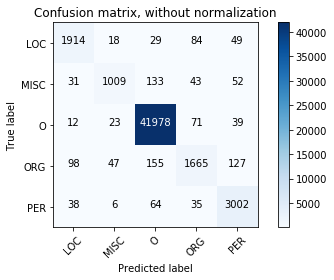

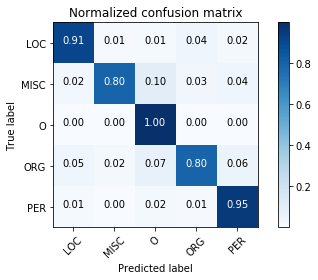

In [9]:
# confusion matrix
# this code is taken from here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cm = confusion_matrix(y_test, y_pred_lsvc)

class_names = ['LOC', 'MISC', 'O', 'ORG', 'PER']

plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

## Word embeddings as features

In [2]:
# load fastText pre-trained word embeddings of the lemmas found in data (train + test)

with open('data_embeddings.pkl', 'rb') as infile:
    data_embeddings = pickle.load(infile)

In [13]:
X_train = list()
for item in list(train_df.lemma):
    embed = data_embeddings[item]
    X_train.append(embed)

In [14]:
X_test = list()
for item in list(test_df.lemma):
    embed = data_embeddings[item]
    X_test.append(embed)

In [15]:
y_train = list(train_df.NER_gold)
y_test = list(test_df.NER_gold)

In [16]:
# train linear SVM model

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)